In [9]:
import pandas as pd
import numpy as np

# Import the first CSV file
feature_df = pd.read_csv('ufc_features.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Drop the columns
columns_to_drop = ['p1_fighter', 'p2_fighter', 'event_date'] #method
feature_df = feature_df.drop(columns=columns_to_drop)
cols_to_drop = [col for col in feature_df.columns if col.startswith('method_')]
feature_df.drop(columns=cols_to_drop, inplace=True)


# Clean all column names
def clean_column_name(col):
  return col.lower().replace(' ', '_').replace('.', '').replace('-', '_')

# Apply to all columns
feature_df.columns = [clean_column_name(col) for col in feature_df.columns]

Available columns:
['referee', 'winner', 'p1_height', 'p1_weight', 'p1_reach', 'p1_stance', 'p1_slpm', 'p1_str_acc', 'p1_sapm', 'p1_str_def', 'p1_td_avg', 'p1_td_acc', 'p1_td_def', 'p1_sub_avg', 'p2_height', 'p2_weight', 'p2_reach', 'p2_stance', 'p2_slpm', 'p2_str_acc', 'p2_sapm', 'p2_str_def', 'p2_td_avg', 'p2_td_acc', 'p2_td_def', 'p2_sub_avg', 'p1_age_at_event', 'p2_age_at_event', 'height_diff', 'reach_diff', 'weight_diff', 'age_diff', 'slpm_diff', 'stracc_diff', 'sapm_diff', 'strdef_diff', 'tdavg_diff', 'tdacc_diff', 'tddef_diff', 'subavg_diff', 'p1_days_since_last_fight', 'p2_days_since_last_fight', 'days_since_last_fight_diff', 'p1_wins', 'p1_losses', 'p1_total', 'p2_wins', 'p2_losses', 'p2_total', 'win_diff', 'loss_diff', 'total_diff', 'p1_win_streak', 'p2_win_streak', 'p1_age_adjusted_slpm', 'p2_age_adjusted_slpm', 'p1_age_adjusted_str_acc', 'p2_age_adjusted_str_acc', 'p1_age_adjusted_sapm', 'p2_age_adjusted_sapm', 'p1_age_adjusted_str_def', 'p2_age_adjusted_str_def', 'p1_age_a

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ referee             │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stance (InputLayer) │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ referee_embedding   │ (None, 1, 8)      │      1,856 │ referee[0][0]     │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stance_embedding    │ (None, 1, 4)      │         24 │ stance[0][0]      │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ squeeze_layer       │ (None, 8)         │          0 │ referee_embeddin… │
│ (SqueezeLayer)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ squeeze_layer_1     │ (None, 4)         │          0 │ stance_embedding… │
│ (SqueezeLayer)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ numeric             │ (None, 70)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 82)        │          0 │ squeeze_layer[0]… │
│ (Concatenate)       │                   │            │ squeeze_layer_1[… │
│                     │                   │            │ numeric[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ (None, 1, 82)     │          0 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 1, 128)    │     75,264 │ lambda[0][0]      │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 1, 128)    │        256 │ bidirectional[0]… │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 1, 128)    │          0 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_1     │ (None, 64)        │     41,216 │ dropout[0][0]     │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 64)        │        128 │ bidirectional_1[… │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 64)        │          0 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 32)        │      2,080 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 120,824 (471.97 KB)

 Trainable params: 120,824 (471.97 KB)

 Non-trainable params: 0 (0.00 B)

Siamese Model Summary:


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ p1_referee          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ p1_stance           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ p1_numeric          │ (None, 70)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ p2_referee          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ p2_stance           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ p2_numeric          │ (None, 70)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ functional          │ (None, 32)        │    120,824 │ p1_referee[0][0], │
│ (Functional)        │                   │            │ p1_stance[0][0],  │
│                     │                   │            │ p1_numeric[0][0], │
│                     │                   │            │ p2_referee[0][0], │
│                     │                   │            │ p2_stance[0][0],  │
│                     │                   │            │ p2_numeric[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_1 (Lambda)   │ (None, 32)        │          0 │ functional[0][0], │
│                     │                   │            │ functional[1][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      2,112 │ lambda_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 64)        │        128 │ dense_1[0][0]     │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 64)        │          0 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 32)        │      2,080 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 32)        │         64 │ dense_2[0][0]     │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 32)        │          0 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 1)         │         33 │ dropout_3[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 125,241 (489.22 KB)

 Trainable params: 125,241 (489.22 KB)

 Non-trainable params: 0 (0.00 B)

Class weights: {0: 1.3676286072772899, 1: 0.7881417208966016}
Epoch 1/50
157/164 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5082 - loss: 1.5100 - precision: 0.6329 - recall: 0.5365

164/164 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.5088 - loss: 1.5068 - precision: 0.6336 - recall: 0.5365 - val_accuracy: 0.5856 - val_loss: 1.2381 - val_precision: 0.6956 - val_recall: 0.6240
Epoch 2/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5323 - loss: 1.3146 - precision: 0.6626 - recall: 0.5370 - val_accuracy: 0.5849 - val_loss: 1.1958 - val_precision: 0.7232 - val_recall: 0.5665
Epoch 3/50
160/164 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5450 - loss: 1.2576 - precision: 0.6690 - recall: 0.5424

164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5451 - loss: 1.2570 - precision: 0.6692 - recall: 0.5425 - val_accuracy: 0.5994 - val_loss: 1.1640 - val_precision: 0.7331 - val_recall: 0.5856
Epoch 4/50
158/164 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5510 - loss: 1.1979 - precision: 0.6737 - recall: 0.5443

164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5513 - loss: 1.1978 - precision: 0.6744 - recall: 0.5445 - val_accuracy: 0.6170 - val_loss: 1.1378 - val_precision: 0.7478 - val_recall: 0.6036
Epoch 5/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5600 - loss: 1.1759 - precision: 0.6957 - recall: 0.5502 - val_accuracy: 0.6170 - val_loss: 1.1215 - val_precision: 0.7456 - val_recall: 0.6072
Epoch 6/50
163/164 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5730 - loss: 1.1603 - precision: 0.6930 - recall: 0.5776

164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5732 - loss: 1.1602 - precision: 0.6931 - recall: 0.5777 - val_accuracy: 0.6330 - val_loss: 1.1095 - val_precision: 0.7591 - val_recall: 0.6228
Epoch 7/50
162/164 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5964 - loss: 1.1291 - precision: 0.7250 - recall: 0.5947

164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5964 - loss: 1.1292 - precision: 0.7249 - recall: 0.5948 - val_accuracy: 0.6445 - val_loss: 1.0989 - val_precision: 0.7769 - val_recall: 0.6216
Epoch 8/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6040 - loss: 1.1282 - precision: 0.7250 - recall: 0.6011 - val_accuracy: 0.6414 - val_loss: 1.0893 - val_precision: 0.7798 - val_recall: 0.6108
Epoch 9/50
162/164 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6080 - loss: 1.1038 - precision: 0.7356 - recall: 0.5881

164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6079 - loss: 1.1037 - precision: 0.7356 - recall: 0.5880 - val_accuracy: 0.6491 - val_loss: 1.0785 - val_precision: 0.7875 - val_recall: 0.6168
Epoch 10/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6253 - loss: 1.0880 - precision: 0.7406 - recall: 0.6167 - val_accuracy: 0.6483 - val_loss: 1.0667 - val_precision: 0.7837 - val_recall: 0.6204
Epoch 11/50
163/164 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6111 - loss: 1.0785 - precision: 0.7351 - recall: 0.5952

164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6112 - loss: 1.0785 - precision: 0.7351 - recall: 0.5954 - val_accuracy: 0.6544 - val_loss: 1.0498 - val_precision: 0.7906 - val_recall: 0.6240
Epoch 12/50
159/164 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6233 - loss: 1.0578 - precision: 0.7484 - recall: 0.6087

164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6231 - loss: 1.0580 - precision: 0.7483 - recall: 0.6085 - val_accuracy: 0.6590 - val_loss: 1.0399 - val_precision: 0.7969 - val_recall: 0.6251
Epoch 13/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6232 - loss: 1.0455 - precision: 0.7535 - recall: 0.6088 - val_accuracy: 0.6575 - val_loss: 1.0263 - val_precision: 0.7954 - val_recall: 0.6240
Epoch 14/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6256 - loss: 1.0386 - precision: 0.7548 - recall: 0.6007 - val_accuracy: 0.6575 - val_loss: 1.0192 - val_precision: 0.7991 - val_recall: 0.6192
Epoch 15/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6387 - loss: 1.0225 - precision: 0.7591 - recall: 0.6155 - val_accuracy: 0.6521 - val_loss: 1.0115 - val_precision: 0.7969 - val_recall: 0.6108
Epoch 16/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6285 - loss: 1.0207 - precision: 0.7523 - recall: 0.6133 - val_accuracy: 0.6491 - val_loss: 1.0060 - 

164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6545 - loss: 0.9862 - precision: 0.7836 - recall: 0.6345 - val_accuracy: 0.6651 - val_loss: 0.9852 - val_precision: 0.8040 - val_recall: 0.6287
Epoch 18/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6520 - loss: 0.9974 - precision: 0.7634 - recall: 0.6388 - val_accuracy: 0.6651 - val_loss: 0.9794 - val_precision: 0.7994 - val_recall: 0.6347
Epoch 19/50
162/164 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6546 - loss: 0.9818 - precision: 0.7614 - recall: 0.6417

164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6545 - loss: 0.9817 - precision: 0.7615 - recall: 0.6415 - val_accuracy: 0.6705 - val_loss: 0.9681 - val_precision: 0.7971 - val_recall: 0.6491
Epoch 20/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6544 - loss: 0.9591 - precision: 0.7797 - recall: 0.6358 - val_accuracy: 0.6636 - val_loss: 0.9633 - val_precision: 0.8043 - val_recall: 0.6251
Epoch 21/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6556 - loss: 0.9555 - precision: 0.7806 - recall: 0.6379 - val_accuracy: 0.6606 - val_loss: 0.9523 - val_precision: 0.8050 - val_recall: 0.6180
Epoch 22/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6715 - loss: 0.9372 - precision: 0.8001 - recall: 0.6435 - val_accuracy: 0.6628 - val_loss: 0.9420 - val_precision: 0.8050 - val_recall: 0.6228
Epoch 23/50
160/164 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6524 - loss: 0.9391 - precision: 0.7724 - recall: 0.6355

164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6524 - loss: 0.9389 - precision: 0.7726 - recall: 0.6353 - val_accuracy: 0.6751 - val_loss: 0.9306 - val_precision: 0.8203 - val_recall: 0.6287
Epoch 24/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6539 - loss: 0.9348 - precision: 0.7765 - recall: 0.6322 - val_accuracy: 0.6651 - val_loss: 0.9257 - val_precision: 0.8068 - val_recall: 0.6251
Epoch 25/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6691 - loss: 0.9038 - precision: 0.7973 - recall: 0.6435 - val_accuracy: 0.6743 - val_loss: 0.9197 - val_precision: 0.8190 - val_recall: 0.6287
Epoch 26/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6486 - loss: 0.9041 - precision: 0.7731 - recall: 0.6393 - val_accuracy: 0.6728 - val_loss: 0.9101 - val_precision: 0.8195 - val_recall: 0.6251
Epoch 27/50
161/164 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6728 - loss: 0.8855 - precision: 0.8022 - recall: 0.6411

164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6728 - loss: 0.8855 - precision: 0.8020 - recall: 0.6413 - val_accuracy: 0.6758 - val_loss: 0.9007 - val_precision: 0.8166 - val_recall: 0.6347
Epoch 28/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6694 - loss: 0.8874 - precision: 0.7845 - recall: 0.6603 - val_accuracy: 0.6758 - val_loss: 0.8915 - val_precision: 0.8206 - val_recall: 0.6299
Epoch 29/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6777 - loss: 0.8636 - precision: 0.8016 - recall: 0.6607 - val_accuracy: 0.6751 - val_loss: 0.8832 - val_precision: 0.8135 - val_recall: 0.6371
Epoch 30/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6629 - loss: 0.8663 - precision: 0.7844 - recall: 0.6412 - val_accuracy: 0.6720 - val_loss: 0.8760 - val_precision: 0.8039 - val_recall: 0.6431
Epoch 31/50
162/164 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6853 - loss: 0.8500 - precision: 0.7997 - recall: 0.6767

164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6852 - loss: 0.8500 - precision: 0.7996 - recall: 0.6764 - val_accuracy: 0.6789 - val_loss: 0.8658 - val_precision: 0.8074 - val_recall: 0.6527
Epoch 32/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6808 - loss: 0.8387 - precision: 0.8027 - recall: 0.6591 - val_accuracy: 0.6766 - val_loss: 0.8571 - val_precision: 0.8093 - val_recall: 0.6455
Epoch 33/50
158/164 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6698 - loss: 0.8371 - precision: 0.7919 - recall: 0.6510

164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6701 - loss: 0.8369 - precision: 0.7919 - recall: 0.6514 - val_accuracy: 0.6812 - val_loss: 0.8510 - val_precision: 0.8101 - val_recall: 0.6539
Epoch 34/50
162/164 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6809 - loss: 0.8261 - precision: 0.7996 - recall: 0.6545

164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6810 - loss: 0.8259 - precision: 0.7997 - recall: 0.6546 - val_accuracy: 0.6843 - val_loss: 0.8449 - val_precision: 0.8006 - val_recall: 0.6731
Epoch 35/50
159/164 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6809 - loss: 0.8294 - precision: 0.7890 - recall: 0.6592

164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6811 - loss: 0.8290 - precision: 0.7895 - recall: 0.6596 - val_accuracy: 0.6904 - val_loss: 0.8418 - val_precision: 0.8125 - val_recall: 0.6695
Epoch 36/50
160/164 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6799 - loss: 0.8242 - precision: 0.7829 - recall: 0.6723

164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6800 - loss: 0.8238 - precision: 0.7833 - recall: 0.6723 - val_accuracy: 0.6911 - val_loss: 0.8313 - val_precision: 0.8119 - val_recall: 0.6719
Epoch 37/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6883 - loss: 0.7990 - precision: 0.8065 - recall: 0.6722 - val_accuracy: 0.6781 - val_loss: 0.8258 - val_precision: 0.8044 - val_recall: 0.6551
Epoch 38/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6891 - loss: 0.7932 - precision: 0.7988 - recall: 0.6759 - val_accuracy: 0.6843 - val_loss: 0.8221 - val_precision: 0.8085 - val_recall: 0.6623
Epoch 39/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7015 - loss: 0.7812 - precision: 0.8168 - recall: 0.6830 - val_accuracy: 0.6797 - val_loss: 0.8194 - val_precision: 0.8023 - val_recall: 0.6611
Epoch 40/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6881 - loss: 0.7721 - precision: 0.7955 - recall: 0.6753 - val_accuracy: 0.6911 - val_loss: 0.8135 -

164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6958 - loss: 0.7556 - precision: 0.8085 - recall: 0.6841 - val_accuracy: 0.6972 - val_loss: 0.7888 - val_precision: 0.8122 - val_recall: 0.6838
Epoch 45/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7044 - loss: 0.7381 - precision: 0.8142 - recall: 0.6995 - val_accuracy: 0.6827 - val_loss: 0.7917 - val_precision: 0.8052 - val_recall: 0.6635
Epoch 46/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6825 - loss: 0.7437 - precision: 0.8033 - recall: 0.6612 - val_accuracy: 0.6850 - val_loss: 0.7829 - val_precision: 0.7975 - val_recall: 0.6790
Epoch 47/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7156 - loss: 0.7223 - precision: 0.8184 - recall: 0.7097 - val_accuracy: 0.6720 - val_loss: 0.7818 - val_precision: 0.7951 - val_recall: 0.6551
Epoch 48/50
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7046 - loss: 0.7365 - precision: 0.8149 - recall: 0.6891 - val_accuracy: 0.6743 - val_loss: 0.7851 - 

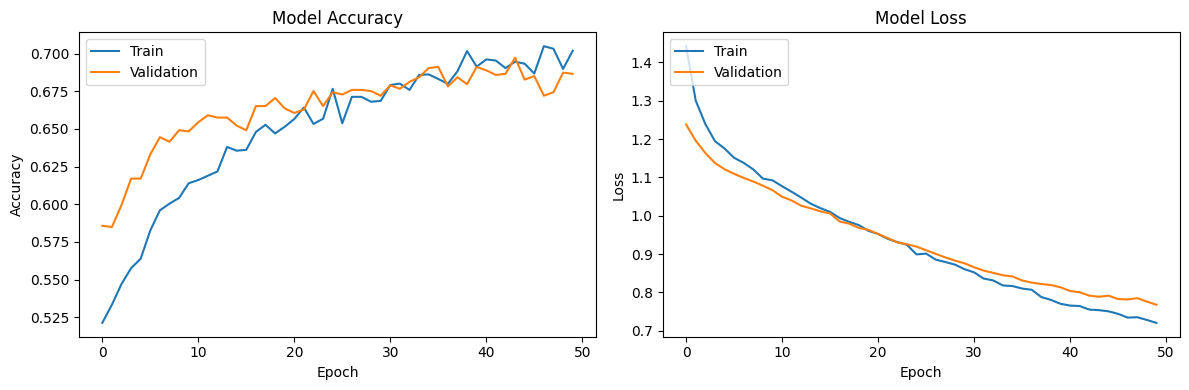

In [10]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Concatenate, LSTM, Bidirectional, Dense, Lambda, Dropout, LayerNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# ============= DATA PREPARATION =============

# Import the CSV file
feature_df = pd.read_csv('ufc_features.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Drop the columns
columns_to_drop = ['p1_fighter', 'p2_fighter', 'event_date']
feature_df = feature_df.drop(columns=[col for col in columns_to_drop if col in feature_df.columns])
cols_to_drop = [col for col in feature_df.columns if col.startswith('method_')]
feature_df.drop(columns=cols_to_drop, inplace=True)

# Clean all column names
def clean_column_name(col):
    return col.lower().replace(' ', '_').replace('.', '').replace('-', '_')

# Apply to all columns
feature_df.columns = [clean_column_name(col) for col in feature_df.columns]

# Print column names to debug
print("Available columns:")
print(feature_df.columns.tolist())

# --- Encode categorical features ---
# Check if stance columns exist before encoding
if 'p1_stance' in feature_df.columns and 'p2_stance' in feature_df.columns:
    stance_le = LabelEncoder()
    all_stances = pd.concat([feature_df['p1_stance'], feature_df['p2_stance']])
    stance_le.fit(all_stances)
    feature_df['p1_stance'] = stance_le.transform(feature_df['p1_stance'])
    feature_df['p2_stance'] = stance_le.transform(feature_df['p2_stance'])
else:
    print("Warning: Stance columns not found")
    # Add dummy stance columns if needed
    feature_df['p1_stance'] = 0
    feature_df['p2_stance'] = 0

# Check if referee column exists before encoding
if 'referee' in feature_df.columns:
    referee_le = LabelEncoder()
    referee_le.fit(feature_df['referee'])
    feature_df['referee'] = referee_le.transform(feature_df['referee'])
else:
    print("Warning: Referee column not found")
    # Add dummy referee column if needed
    feature_df['referee'] = 0

# Define the base features we expect to find
base_numeric_feats = [
    'height', 'weight', 'reach', 'slpm', 'str_acc', 'sapm', 'str_def',
    'td_avg', 'td_acc', 'td_def', 'sub_avg', 'age_at_event',
    # Adding fight history metrics
    # 'days_since_last_fight', 'wins', 'losses', 'total', 'win_streak',
    # Adding age-adjusted metrics
    'age_adjusted_slpm', 'age_adjusted_str_acc', 'age_adjusted_sapm',
    'age_adjusted_str_def', 'age_adjusted_td_avg', 'age_adjusted_td_acc',
    'age_adjusted_td_def', 'age_adjusted_sub_avg',
    # Adding EMA metrics
    'kd_ema', 'sig_str_pct_ema', 'td_pct_ema', 'sub_att_ema', 'rev_ema',
    'ctrl_ema', 'r1_kd_ema', 'r1_sig_str_pct_ema', 'r1_td_pct_ema',
    'r1_sub_att_ema', 'r1_rev_ema', 'r1_ctrl_ema',
    'sig_str_pct_detailed_ema', 'r1_sig_str_pct_detailed_ema',
    'sig_str_landed_ema', 'sig_str_attempted_ema',
    'total_str_landed_ema', 'total_str_attempted_ema',
    'td_landed_ema', 'td_attempted_ema',
    'r1_sig_str_landed_ema', 'r1_sig_str_attempted_ema',
    'r1_total_str_landed_ema', 'r1_total_str_attempted_ema',
    'r1_td_landed_ema', 'r1_td_attempted_ema',
    'head_landed_ema', 'head_attempted_ema',
    'body_landed_ema', 'body_attempted_ema',
    'leg_landed_ema', 'leg_attempted_ema',
    'distance_landed_ema', 'distance_attempted_ema',
    'clinch_landed_ema', 'clinch_attempted_ema',
    'ground_landed_ema', 'ground_attempted_ema',
    'r1_head_landed_ema', 'r1_head_attempted_ema',
    'r1_body_landed_ema', 'r1_body_attempted_ema',
    'r1_leg_landed_ema', 'r1_leg_attempted_ema',
    'r1_distance_landed_ema', 'r1_distance_attempted_ema',
    'r1_clinch_landed_ema', 'r1_clinch_attempted_ema',
    'r1_ground_landed_ema', 'r1_ground_attempted_ema'
]

# Find which features actually exist in the DataFrame with p1/p2 prefixes
available_numeric_feats = []
for feat in base_numeric_feats:
    if f'p1_{feat}' in feature_df.columns and f'p2_{feat}' in feature_df.columns:
        available_numeric_feats.append(feat)

print(f"Found {len(available_numeric_feats)} available numeric features")
print("Available features:", available_numeric_feats)

# Use only available features
numeric_feats = available_numeric_feats

p1_numeric = ['p1_' + f for f in numeric_feats]
p2_numeric = ['p2_' + f for f in numeric_feats]

# Handle potential NaN values
feature_df[p1_numeric + p2_numeric] = feature_df[p1_numeric + p2_numeric].fillna(0)

# Scale numeric features
scaler = StandardScaler()
feature_df[p1_numeric + p2_numeric] = scaler.fit_transform(feature_df[p1_numeric + p2_numeric])

# --- Prepare features for Siamese model ---
# Extract individual components for each fighter
p1_referee = feature_df['referee'].values.astype(int)[:, np.newaxis]
p1_stance = feature_df['p1_stance'].values.astype(int)[:, np.newaxis]
p1_numeric_data = feature_df[p1_numeric].values

p2_referee = feature_df['referee'].values.astype(int)[:, np.newaxis]
p2_stance = feature_df['p2_stance'].values.astype(int)[:, np.newaxis]
p2_numeric_data = feature_df[p2_numeric].values

# Target variable
if 'winner' in feature_df.columns:
    y_data = feature_df['winner'].values
else:
    raise ValueError("Winner column not found in dataset")

# ============= MODEL DEFINITION =============

# Get dimensions for model inputs
num_referees = int(feature_df['referee'].max()) + 1
num_stances = int(max(feature_df['p1_stance'].max(), feature_df['p2_stance'].max())) + 1
num_numeric = len(numeric_feats)


class SqueezeLayer(tf.keras.layers.Layer):
    def __init__(self, axis, **kwargs):
        super(SqueezeLayer, self).__init__(**kwargs)
        self.axis = axis
    
    def call(self, inputs):
        return tf.squeeze(inputs, axis=self.axis)


def create_fighter_encoder():
    input_referee = Input(shape=(1,), name='referee')
    input_stance = Input(shape=(1,), name='stance')
    input_numeric = Input(shape=(num_numeric,), name='numeric')
    
    # Embedding layers with L2 regularization
    emb_referee = Embedding(num_referees, 8, 
                           name='referee_embedding',
                           embeddings_regularizer=l2(0.001))(input_referee)
    emb_stance = Embedding(num_stances, 4, 
                          name='stance_embedding',
                          embeddings_regularizer=l2(0.001))(input_stance)
    
    # Use SqueezeLayer instead of direct tf.squeeze calls
    emb_referee = SqueezeLayer(axis=1)(emb_referee)  # Changed this line
    emb_stance = SqueezeLayer(axis=1)(emb_stance)    # Changed this line
    
    # Concatenate all features
    concat = Concatenate(axis=-1)([emb_referee, emb_stance, input_numeric])
    
    # Reshape for LSTM (add time dimension)
    x = Lambda(lambda x: tf.expand_dims(x, axis=1))(concat)
    
    # BiLSTM layers
    x = Bidirectional(LSTM(64, return_sequences=True, 
                          kernel_regularizer=l2(0.001)))(x)
    x = LayerNormalization()(x)
    x = Dropout(0.4)(x)
    
    x = Bidirectional(LSTM(32, 
                          kernel_regularizer=l2(0.001)))(x)
    x = LayerNormalization()(x)
    x = Dropout(0.4)(x)
    
    # Final embedding
    embedding = Dense(32, activation='relu', kernel_regularizer=l2(0.001))(x)
    
    # Create model
    return Model(inputs=[input_referee, input_stance, input_numeric], outputs=embedding)

# Create the shared encoder
fighter_encoder = create_fighter_encoder()
print("Fighter Encoder Summary:")
fighter_encoder.summary()

# Apply the same encoder to both fighters
p1_inputs = [Input(shape=(1,), name='p1_referee'),
             Input(shape=(1,), name='p1_stance'),
             Input(shape=(num_numeric,), name='p1_numeric')]

p2_inputs = [Input(shape=(1,), name='p2_referee'),
             Input(shape=(1,), name='p2_stance'),
             Input(shape=(num_numeric,), name='p2_numeric')]

p1_embedding = fighter_encoder(p1_inputs)
p2_embedding = fighter_encoder(p2_inputs)

# Compute feature difference for comparison
diff = Lambda(lambda x: x[0] - x[1])([p1_embedding, p2_embedding])

# Add comparison layers
x = Dense(64, activation='relu', kernel_regularizer=l2(0.001))(diff)
x = LayerNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(32, activation='relu', kernel_regularizer=l2(0.001))(x)
x = LayerNormalization()(x)
x = Dropout(0.3)(x)

# Predict winner
output = Dense(1, activation='sigmoid', kernel_regularizer=l2(0.001))(x)

# Create final model
siamese_model = Model(inputs=p1_inputs + p2_inputs, outputs=output)

# Compile model
siamese_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4),
                     loss='binary_crossentropy',
                     metrics=['accuracy',
                             tf.keras.metrics.Precision(name='precision'),
                             tf.keras.metrics.Recall(name='recall')])

print("Siamese Model Summary:")
siamese_model.summary()

# ============= TRAINING =============

# Split data into train/test sets
X_train_p1_ref, X_test_p1_ref, X_train_p1_stance, X_test_p1_stance, \
X_train_p1_num, X_test_p1_num, X_train_p2_ref, X_test_p2_ref, \
X_train_p2_stance, X_test_p2_stance, X_train_p2_num, X_test_p2_num, \
y_train, y_test = train_test_split(
    p1_referee, p1_stance, p1_numeric_data, 
    p2_referee, p2_stance, p2_numeric_data,
    y_data, test_size=0.2, random_state=42
)

# Define callbacks
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    min_delta=0.001,
    restore_best_weights=True
)

checkpoint = ModelCheckpoint(
    'best_siamese_model.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

# Compute class weights if needed
class_counts = np.bincount(y_train.astype(int))
total = class_counts.sum()
class_weights = {i: total/(len(class_counts)*count) for i, count in enumerate(class_counts)}
print("Class weights:", class_weights)

# Train the model
history = siamese_model.fit(
    [X_train_p1_ref, X_train_p1_stance, X_train_p1_num, 
     X_train_p2_ref, X_train_p2_stance, X_train_p2_num],
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop, checkpoint],
    class_weight=class_weights
)

# ============= EVALUATION =============

# Evaluate on test data
test_loss, test_acc, test_prec, test_recall = siamese_model.evaluate(
    [X_test_p1_ref, X_test_p1_stance, X_test_p1_num, 
     X_test_p2_ref, X_test_p2_stance, X_test_p2_num],
    y_test,
    verbose=1
)

print(f"\nTest Results:")
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test precision: {test_prec:.4f}")
print(f"Test recall: {test_recall:.4f}")

# ============= VISUALIZATION =============

# Plot training history
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()

